## StackOverflow over time

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [10]:
all_years = pd.read_pickle('data/combined_years.pkl')

In [11]:
all_years.head()

,age,job_satisfaction,annual_compensation,csharp,python,python_and_csharp
year,,,,,,
2011,< 20,FML,Student / Unemployed,False,False,False
2011,25-29,So happy it hurts,NaN,False,False,False
2011,25-29,NaN,NaN,False,False,False
2011,< 20,I enjoy going to work,Student / Unemployed,False,False,False
2011,35-39,It pays the bills,"$80,000 - $100,000",False,False,False


In [12]:
plt.style.use('ggplot')

In [13]:
import locale

def create_thousand_formatter():
    locale.setlocale(locale.LC_ALL, 'en-US')
    thousand_formatter = plt.FuncFormatter(lambda x, _ : locale.format_string("%d", x, grouping=True))
    return thousand_formatter

thousand_formatter = create_thousand_formatter()

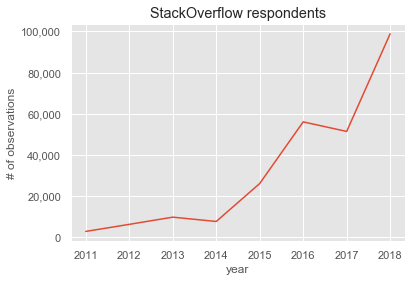

In [14]:
fig, ax = plt.subplots(1, figsize=(6, 4))
ax.plot(all_years.groupby('year').size())
ax.set_xlabel('year')
ax.set_ylabel('# of observations')
ax.set_title('StackOverflow respondents')
ax.yaxis.set_major_formatter(thousand_formatter)
# ax.set_facecolor('#fdfdfe')
plt.show()

In [15]:
def csharp_or_python(col):
    if col['csharp'] and col['python']:
        return 'Both'
    elif col['csharp']:
        return 'C#'
    elif col['python']:
        return 'Python'
    return 'Other'

In [16]:
all_years['lang'] = all_years.apply(lambda col: csharp_or_python(col), axis=1)

In [17]:
all_years.groupby(['year','lang']).size().unstack(-1)

lang,Both,C#,Other,Python
year,,,,
2011,198,1154,1084,377
2012,363,2105,2928,847
2013,417,2610,5252,1463
2014,304,2074,4096,1169
2015,1070,5879,14969,4168
2016,2563,12720,31028,9719
2017,2901,9575,30113,8803
2018,8722,18232,50264,21637


ValueError: need at least one array to concatenate

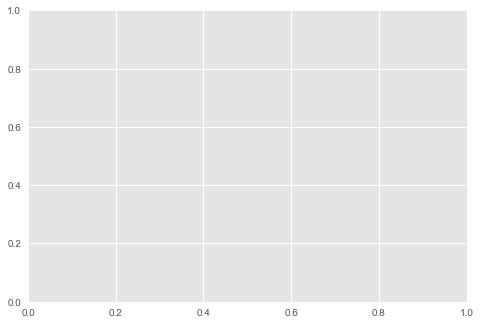

In [77]:
fig, ax = plt.subplots(1, figsize=(7, 5))
ax.stackplot(all_years.groupby(['year','lang']).size().unstack(-1))
ax.set_xlabel('year')
ax.set_ylabel('# of observations')
ax.set_title('StackOverflow respondents')
ax.yaxis.set_major_formatter(thousand_formatter)
# ax.set_facecolor('#fdfdfe')
plt.show()